# ECE3311 Project 3
## Team 6: Maya Flores, Selina Spry, Emma Williams

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
import scipy.signal
import scipy.interpolate
import math

In [3]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

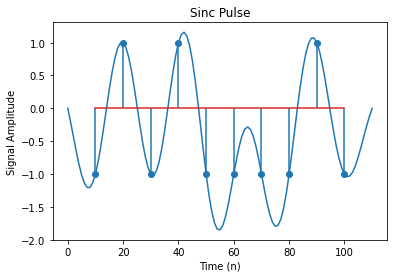

In [4]:
# Generate random polar data
d = 2*np.around(np.random.random((10,)))-1

# Define sinc pulse shape
ps_sinc = np.sinc(np.arange(-11,11,0.1))

# Create transmission using Sinc pulse shape

# Upsampling 
N = 10
d_upsample = np.zeros((N*N,))
d_upsample[::N] = d  #impulse train
sig_temp1 = np.convolve(d_upsample, ps_sinc)
sig1 = sig_temp1[100:211]

# Sanity check
plt.plot(sig1)
# plt.show()

# Sample the received waveform to 
# extract out of it the desired values
index = np.arange(10,110,10)
d_hat1 = sig1[index]
plt.stem(index,d_hat1)

plt.title('Sinc Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 1:
<br>Based on the sinc pulse shape example in Section 3, you are tasked with implementing a similar pulse shaping transmission system using the raised cosine pulse shape.Furthermore, you will need to demonstrate that it is possible to extract the original samplesfrom the recovered pulse shaped signal, similar to the plot shown in Figure 3.

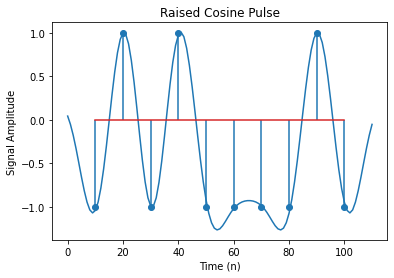

In [5]:
# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Create transmission using rcos pulse shape

# Upsampling 
sig_temp2 = np.convolve(d_upsample, ps_rcos[1])
sig2 = sig_temp2[20:131]

# Sanity check
plt.plot(sig2)

plt.stem(index,d_hat1)

plt.title('Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


## Question 2:
<br> Please demonstrate that only using the square-root raised cosine pulse shaping filter at the transmitter will not eliminate ISI when the received signal is sampled in order to recover the original data,i.e., produce the plot shown in Figure 4.

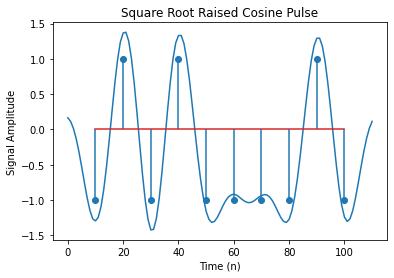

In [6]:
# Define square-root raised cosine pulse shape (roll-off = 0.5)
ps_srrcos = rrcosfilter(61,0.5,1,10)

# Create transmission using sqrt rcos pulse shape

# Upsampling 
sig_temp3 = np.convolve(d_upsample, ps_srrcos[1])
sig3 = sig_temp3[20:131]

# Sanity check
plt.plot(sig3)

plt.stem(index,d_hat1)

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()



## Question 3:
<br>Please demonstrate how two square-root raised cosine filters in series can yield recovered samples that do not suffer the impact of ISI

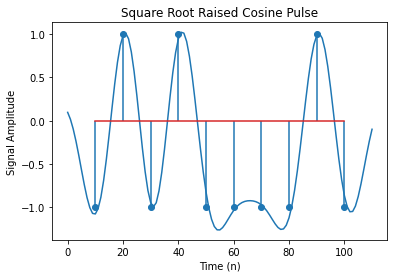

In [7]:
# Define square-root raised cosine pulse shape (roll-off = 0.5)
# ps_srrcos = rrcosfilter(61,0.5,1,10)

# Create transmission using sqrt rcos pulse shape

# Down sampling
# N = 10
# d_downsample = np.zeros((N*N,))
# d_downsample[::N] = d*(1/10)  #impulse train
# sig_temp = np.convolve(d_downsample, sig_temp)
# sig1 = sig_temp[100:211]

# Upsampling 
sig_temp4 = np.convolve(sig_temp3, ps_srrcos[1])/10
sig4 = sig_temp4[50:161]

# Sanity check
plt.plot(sig4)

plt.stem(index,d_hat1)

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


## Question 4:
<br>Please demonstrate this same situation by replicating the impact of a non-ideal channel as shown in Figure 6.

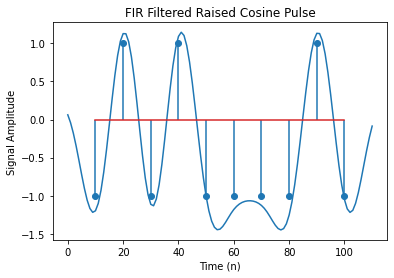

In [8]:
# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]      # FIR filter

# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Create transmission 

# Upsampling 
sig_temp5 = np.convolve(d_upsample, ps_rcos[1])
sig_temp6 = np.convolve(sig_temp5, h)
sig6 = sig_temp6[20:131]

# Sanity check
plt.plot(sig6)

plt.stem(index,d_hat1)

plt.title('FIR Filtered Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


## Question 5:
<br>For this section, please obtain a filter that can mitigate the impact of h, and demonstrate its effectiveness using a plot similar to Figure 7. It is recommended to use a function such as scipy.signal.lfilter.

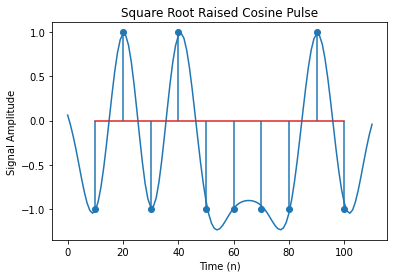

In [9]:
# Create a channel with some multipath propagation
# h = [1,0.1,0.05,0.001]      # FIR filter
h = [-1,0.1,0.05,0.001]      # FIR filter

# Create transmission 
sig7 = scipy.signal.lfilter(h,-1,sig6)

# Sanity check
plt.plot(sig7)
plt.stem(index,d_hat1)

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()



## Question 6:
<br>Please implement and demonstrate a PM waveform similar to the one shown in Figure 9

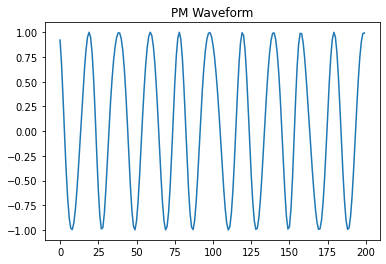

In [10]:
# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 200  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
sig_am = (np.ones((len(analog_wavefm))) + analog_wavefm)*np.exp(1j*w_c*n).real
Dp = 1
sig_pm = (np.exp(1j*Dp*analog_wavefm)*np.exp(1j*w_c*n)).real

# Sanity check 
plt.title("PM Waveform")
plt.plot(sig_pm)
plt.show()

## Question 7:
<br> Please implement your own AM waveform envelope detector using a square law device.

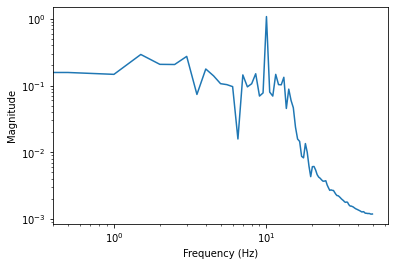

In [11]:
Fs = 100

def FFT_func(signal,N):

    fft = np.fft.fft    # defining FFT as a variable
    
    # frequency response of the 2 sin wave summed signal
    f = Fs*np.arange(N/2)/N                     # freq, x-axis
    signal_FFT = fft(signal)[0:int(N/2)]/N    # FFT of signal
    signal_FFT[1:] = 2*signal_FFT[1:]   # taking positive side 
    signal_FFT = np.abs(signal_FFT)     # neglecting imaginary

    # plot the new signal in frequency domain
    plt.plot(f, signal_FFT) # plotting signal w/ respect to freq
    plt.xscale('log')               # log scale x-axis
    plt.yscale('log')               # log scale y-axis
    plt.xlabel('Frequency (Hz)')    # x-axis, frequency in hertz
    plt.ylabel('Magnitude')         # y-axis, magnitude of signal
    plt.show()

    return signal_FFT       # return the magnitude response

# signal parameters
#N = Fs*sample_time  # total number of points in the signal
amwavesq = sig_am*sig_am
# plotting the frequnecy response using the signal from #9
mag_plot = FFT_func(amwavesq,len(amwavesq))

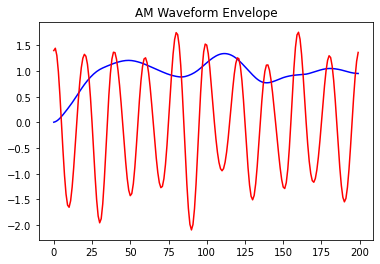

In [12]:
amwavesq = sig_am*sig_am

order = 4
samp_freq = 100
cutoff_freq = 2
norm_cutoff = 2*cutoff_freq/samp_freq

num, den = scipy.signal.butter(order, norm_cutoff)
filtered_sig = scipy.signal.lfilter(num, den, amwavesq)

bb_sig = np.sqrt(filtered_sig)

# for i in range(len(filtered_sig)):
#     bb_sig.append(np.sqrt(filtered_sig[i]))

plt.title("AM Waveform Envelope")
plt.plot(bb_sig, 'b', sig_am, 'r')

plt.show()

## Question 8:
<br> Please implement a product detector for recovering analog signals from PM waveforms.

In [13]:
# multiply by cosine and filter with a LPF

## Question 9:
<br>Manually shift the first 5,000 samples plotted by 1.663 MHz such that it falls on the ideal 108 MHz carrier it was originally  transmitted on. Use the function plotfftIQ.py available in Canvas to plot the result.

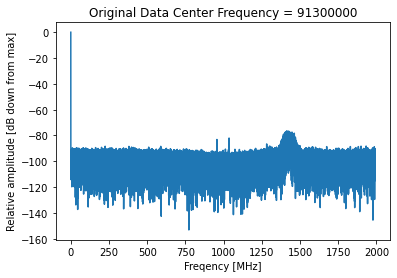

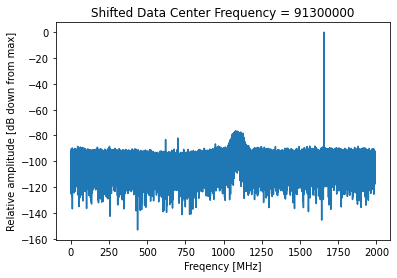

In [14]:
import scipy.signal

from plot_fft_IQ import *
data = np.fromfile("mystery_FM.dat",dtype="uint8")
y = data[0::2] + 1j*data[1::2]
plot_FFT_IQ(y,50000, 90000, 2000000, 91300000, title_of_plot="Original Data")

fs = 2  #MHz
t = np.arange(0, len(y),1)
exp = np.exp(1j*2*np.pi*t*1.663/fs)

y_shifted = np.multiply(y, exp)

plot_FFT_IQ (y_shifted, 50000, 90000, 2000000, 91300000, title_of_plot="Shifted Data")

# window = np.hamming(len(y_shifted))
# print(window)

#I do not know how to apply the hamming window,Kartik just said there is an example of it online but I could not find one, I also cannot get this to plot just the decimated signal,he said when plotting the Fs must be divided by your decimation factor which in this case would be 8, I did that but I am still not getting a plot. 
# y_decimated = scipy.signal.decimate(window, 8)

# plot_FFT_IQ (window, 50000, 90000, 2000000/8, 91300000, title_of_plot="Decimated Data")


## Question 10:
<br>To remove the side noise and begin lowering the sampling rate to the audio range, decimate the shifted signal by 8 and filter with a Hamming window. Plot your result.

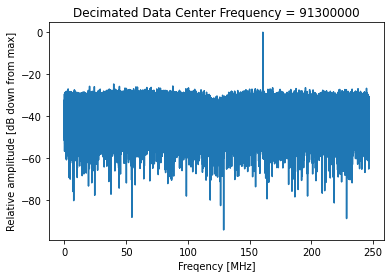

In [19]:
# window = np.hamming(len(y_shifted))
# window = window[::8]
# y_decimated = y_shifted[::8]
y_decimated = scipy.signal.decimate(y_shifted, 8, ftype ='fir')


plot_FFT_IQ (y_decimated, 50000, 90000, 2000000/8, 91300000, title_of_plot="Decimated Data")
# decimated_sig = scipy.signal.decimate(y_shifted, 8)

#firwin2 allows to use hamming window
#What do we pass this filter for parameters?
#In order to filter the signal do we multiply the result of the filter by our signal?

## Question 11:
<br>Using the supplied FMIQDemod.pyfunction, demodulate the signal to baseband. Plot the resulting signal.

In [16]:
from FM_IQ_Demod import *

y_fm_demodulated = fm_demod(filtered_signal)

NameError: name 'filtered_signal' is not defined

## Question 12:
<br>Using a Hamming window and a decimation factor 10, you should be able to listen what you have demodulated. Describe what you hear, and plot the final signal.